<a href="https://colab.research.google.com/github/saiparsa/Machine-Learning-Signal-Processing-Applications/blob/master/GMM_Adaboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import math
import cv2
import librosa
import pandas as pd
import scipy
import cmath
import sys 
from sklearn.decomposition import PCA
import IPython.display as ipd
import seaborn as sns


# Gaussian Mixture Model with MRF Smoothing (Expectation Maximization)


In [ ]:
XL=cv2.imread('im0.ppm') # loading Data
XL=np.array(XL,dtype=int)
XR=cv2.imread('im8.ppm')
XR=np.array(XR,dtype=int)

In [ ]:
diff=[] #calculating disparity matrix 
disparity = np.zeros([381,390])
for i in range(XL.shape[0]):
    for j in range(XL.shape[1]-40):
        for c in range(40):
            
#             diff.append(np.linalg.norm(XR[i][j][:]-XL[i][j+c][:]))
            diff.append(np.linalg.norm(XL[i][j+c][:]-XR[i][j][:]))
        disparity[i][j] = np.argmin(np.asarray(diff))
        diff=[]
    

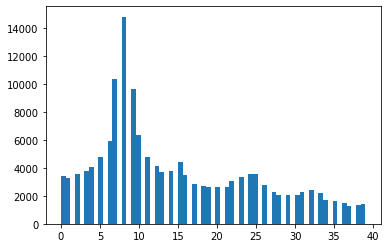

In [ ]:
disparity=np.ndarray.flatten(disparity)
plt.hist(disparity,bins='auto')
plt.show()

In [ ]:
disparity=disparity.reshape(-1,1)

In [ ]:
U = np.zeros([disparity.shape[0],4])
out=0
theta=np.random.rand(4)
theta=np.reshape(theta,(4,1))

In [ ]:
val=[0,0,0,0] #Kmeans
p_theta=np.zeros(4)
for s in range(10) :
    p_theta=theta
    num_clusters = 4
    for j in range(num_clusters):
        for i in range(disparity.shape[0]):
            val[0]=np.square(disparity[i]-theta[0])
            val[1]=np.square(disparity[i]-theta[1])
            val[2]=np.square(disparity[i]-theta[2])
            val[3]=np.square(disparity[i]-theta[3])
            #print(val,val1)
            cmp = np.argmin(np.asarray(val))
#             if val>val1:
#                 cmp=0
#             else:
#                 cmp=1
#             #print (cmp)
            if (cmp==j):
                U[i][j] = 1

            else:
                U[i][j] = 0
        #print(U)
    for j in range(4):
        c=np.count_nonzero(U[:,j])
        if c==0:
            c=1
        for i in range(disparity.shape[0]):            
            out =out+(U[i][j]*disparity[i])
        theta[j]=out/c
        out=0

In [ ]:
pj=[0,0,0,0]
pj[0]=np.sum(U[:,0])/disparity.shape[0]
pj[1]=np.sum(U[:,1])/disparity.shape[0]
pj[2]=np.sum(U[:,2])/disparity.shape[0]
pj[3]=np.sum(U[:,3])/disparity.shape[0]

In [ ]:
out = np.multiply(U,disparity)
mean=[0,0,0,0]
for j in range(4):
    mean[j]=np.sum(out[:,j])/np.count_nonzero(out[:,j])

In [ ]:
var = [0,0,0,0]

var[0]=np.var(out[:,0])
var[1]=np.var(out[:,1])
var[2]=np.var(out[:,2])
var[3]=np.var(out[:,3])

In [ ]:
mean=np.asarray(mean)
mean=mean.reshape(4,1)

In [ ]:
pj=np.asarray(pj)
pj=pj.reshape(4,1)

In [ ]:
#GMM
for k in range(50):
    n=np.zeros([disparity.shape[0],4])
    u=np.zeros([disparity.shape[0],4])
    for i in range(disparity.shape[0]):
        for j in range(4):
            n[i][j]=((1/np.sqrt(2*math.pi*var[j]))* math.exp((-1/2)*np.square((disparity[i]-mean[j]))*(1/var[j])))
            
            u[i][j]=(pj[j]*n[i][j])
    den=np.asarray(np.sum(u,axis=1))
    den=den.reshape(disparity.shape[0],1)
    u=u/den
    #print(den)
    
    sum_uij=np.sum(u,axis=0)
    #print(sum_uij)
    
    num=0
    for j in range(4):
        for i in range(disparity.shape[0]):
            num=num+u[i][j]*disparity[i]
        mean[j]=num/sum_uij[j]
        num=0

    for j in range(4):
        pj[j]=np.asarray(sum_uij[j])/disparity.shape[0]
        #print(pj)

    num1=0
    for j in range(4):
        for i in range(disparity.shape[0]):
            num1=num1+(u[i][j]*np.square(disparity[i]-mean[j]))
        var[j]=num1/sum_uij[j]
        num1=0



In [ ]:
disp=[]
for i in range(u.shape[0]):
    temp=np.argmax(u[i])
    disp.append(mean[int(temp)])

In [ ]:
disp=np.asarray(disp).reshape(381,390)

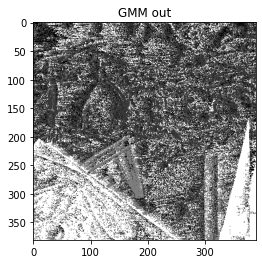

In [ ]:
plt.imshow(disp, 'gray')
plt.title('GMM out')
plt.show()

In [ ]:
u=u.reshape((381,390,4))

In [ ]:
def eq1(cij,ckl,var):
    
    if cij==ckl:
        f = 0
    else:
        f=3
        
    p = np.exp(-(f**2)/(3))
#     print(p)
    return p
    

In [ ]:
for epoch in range(5): #MRF with ICM
    print("Epoch:",epoch)

    for i in range(0,380):
        for j in range(0,389):
            N =[[i-1,j],[i-1,j-1],[i,j-1],[i-1,j],[i+1,j],[i+1,j+1],[i,j+1],[i+1,j]]

            out=[]
            final=[]
            for c in range(4):
                    for k,l in N:          
                        out.append(eq1(c,np.argmax(u[k,l]),var))
                    prod=np.prod(out)
                    out=[]
                    u[i][j][c]=(u[i][j][c]*prod)
            

            

Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4


In [ ]:
u=u.reshape((148590, 4))

In [ ]:
depth_map=np.choose(np.argmax(u,axis=1),mean).reshape((381,390))

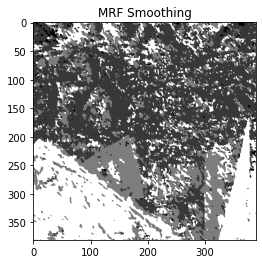

In [ ]:
plt.imshow(depth_map,cmap="gray")
plt.title('MRF Smoothing')
plt.show()

# AdaBoost

In [ ]:
trX=sio.loadmat('trX.mat')['trX']
trY=sio.loadmat('trY.mat')['trY']

In [ ]:
def perceptron(X,y,weight_m,lr,epochs):


    w = np.random.randn(1,2)*1e-5
    b = np.random.randn(1,1)*1e-5 


    for epoch in range(epochs):

        z1 = np.dot(w,X)+b
        a1 = np.tanh(z1)
            
        error=(y-a1)*weight_m*(1-np.tanh(z1)**2)
        dw = np.dot(error,X.T)
        
        w = w -lr*dw
        b=b-lr*np.sum(error)
    
    
    
    return a1,w,b

In [ ]:
def adaboost(learners,X,y,lr,epochs):
    
    weight_m = (1/X.shape[1])*np.ones((1,X.shape[1])) 
    
    weights_m = []
    beta = []
    bias = []
    phi  = []
    

    for learner in range(learners-1):        
        
        pred,weights,bias= perceptron(X,y,weight_m,lr,epochs)
        p=np.sign(pred)     

        num = weight_m*(np.sum(np.where(y==p,1,0)))
        den = weight_m*(np.sum(np.where(y!=p,1,0)))
        b = (0.5)*np.log(num/den)        
    
        weight_m=weight_m*np.exp(-b*y*p)
        weight_m=weight_m/np.sum(weight_m)        
        
        phi.append(p)
        beta.append(b)
        weights_m.append(weight_m)
        
    
    beta=np.array(beta)
    phi=np.array(phi)
    

    return beta,phi


 

In [ ]:
beta,phi = adaboost(500,trX,trY,0.01,10000)
Y_pred=np.sum(beta*phi,axis=0)


In [ ]:

def accy(pred,y):
    c=0
    x=y.shape[0]
    for i in range(x):
        if y[i] == np.sign(pred[i]):
            c+=1
    return(c/x)
            

In [ ]:
accy(Y_pred.T,trY.T)*100

78.125

# Source Seperation


In [ ]:
from scipy.io import wavfile
s=librosa.load('trs.wav',sr=16000)[0]
n=librosa.load('trn.wav',sr=16000)[0]

In [ ]:
x = s+n

In [ ]:
S=librosa.stft(s, n_fft=1024, hop_length=512,window='hann')
N=librosa.stft(n, n_fft=1024, hop_length=512,window='hann')
X=librosa.stft(x, n_fft=1024, hop_length=512,window='hann')
X=np.abs(X)

In [ ]:
M = np.zeros((S.shape))
for f in range(S.shape[0]):
    for t in range(S.shape[1]):
        if np.abs(S[f][t])> np.abs(N[f][t]):
            M[f][t] = 1
        else:
            M[f][t] = 0
            

In [ ]:
def predict(X,params):
    y_pred=feed_forward_network(X.T, params)[0]
    #y_pred=y_pred.T
    for i in range(y_pred.shape[0]):
        for j in range(y_pred.shape[1]):
            if y_pred[i][j]>0.5:
                y_pred[i][j]=1
            else:
                y_pred[i][j]=0
    return y_pred.T

In [ ]:
def cost(pred, real):
    return(np.sum(1/2*(pred-real)**2))

In [ ]:
def set_parameters(x,y,hidden_size):
    
    input_size = x.shape[1]
    output_size = y.shape[1]
    w1 = np.random.randn(hidden_size, input_size)*1e-5
    b1 = np.zeros((hidden_size, 1))
    w2 = np.random.randn(output_size, hidden_size)*1e-5
    b2 = np.zeros((output_size, 1))
    return {'w1': w1, 'w2': w2, 'b1': b1, 'b2': b2}


In [ ]:
def feed_forward_network(x, params):
    z1 = np.dot(params['w1'], x.T)+params['b1']
  #print(z1)
    a1 = np.tanh(z1)
  #print(a1)
    z2 = np.dot(params['w2'], a1)+params['b2']
  #print(z2)
    y = np.tanh(z2)  
  #print(y)
    return y, {'z1': z1, 'z2': z2, 'a1': a1, 'y': y}

In [ ]:
def back_propagation(x, y, params, cache,y_pred):
   
    loss = cost(y_pred.T,y)
    #print(loss)
    #print('Error :', loss)
    error = cache['y'] - y.T
    error_delta = error * (1-np.tanh(cache['y'])**2)  
    dw2 = error_delta.dot(cache['a1'].T)
    db2 = np.sum(error, axis=1, keepdims=True)
    z2_error = error_delta.T.dot(params['w2'])
    z2_delta = z2_error.T * (1-np.tanh(cache['a1']**2))
    dw1 = z2_delta.dot(x)
    db1 = np.sum(z2_delta, axis=1, keepdims=True)

    return {"dw1": dw1, "db1": db1, "dw2": dw2, "db2": db2},loss

In [ ]:
def update_parameters(gradients,params, learning_rate):
    w1 = params['w1'] - learning_rate * gradients['dw1']
    b1 = params['b1'] - learning_rate * gradients['db1']
    w2 = params['w2'] - learning_rate * gradients['dw2']
    b2 = params['b2'] - learning_rate * gradients['db2']
    return {'w1': w1, 'w2': w2, 'b1': b1, 'b2': b2}

In [ ]:
def build_neural_network(x,y):
    params = set_parameters(x,y,50)
    loss = {}
    for i in range(30000):
        op,op_cache = feed_forward_network(x,params)
        gradients,loss[i] = back_propagation(x,y,params,op_cache,op)
        params = update_parameters(gradients,params,1e-7)
    lists = sorted(loss.items()) # sorted by key, return a list of tuples

    x, y = zip(*lists) # unpack a list of pairs into two tuples

    plt.plot(x,y)
    plt.show()
    #print(loss)
    return params

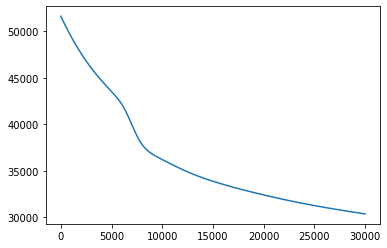

In [ ]:
params=build_neural_network(X.T,M.T) # on data without kernel pca

In [ ]:
M_pred=predict(X,params)

In [ ]:
from scipy.io import wavfile
x_t=librosa.load('tex.wav',sr=16000)[0]
g=librosa.load('tes.wav',sr=16000)[0]

In [ ]:
X_T=librosa.stft(x_t, n_fft=1024, hop_length=512,window='hann')
G=librosa.stft(n, n_fft=1024, hop_length=512,window='hann')

In [ ]:
M_pred=predict(X_T,params)

In [ ]:
x_pred = np.multiply(M_pred.T,X_T)
out=librosa.istft(x_pred,hop_length=512,length=len(g))

In [ ]:
g= g.reshape(-1,1)
out = out.reshape(-1,1)

In [ ]:
num = np.dot(g.T,out)
den = np.dot((g-out).T,(g-out))
SNR = 10 * np.log10(num/den)
float(-SNR)

7.803951263427734

# PLSI for Analysing Twitter stream

In [ ]:
twitter = sio.loadmat("twitter.mat")
X_train = twitter["Xtr"]
Y_train = twitter["YtrMat"]
X_test = twitter["Xte"]
Y_test = twitter["YteMat"]

In [ ]:
D_train = X_train.shape[1]
D_test = X_test.shape[1]
B = np.random.rand(X_train.shape[0],50)
theta = np.random.rand(50,D_train)

In [ ]:
V = np.ones(X_train.shape[0])
K = np.ones(50)

for i in range(50):
    
    B = np.multiply(B,np.matmul(X_train/(np.matmul(B,theta)+1e-10),theta.T))
    B = B/(np.matmul(V,B)+1e-10)

    theta = np.multiply(theta,np.matmul(B.T,(X_train/(np.matmul(B,theta)+1e-10))))
    theta = theta/(np.matmul(K,theta)+1e-10)
    
train = theta

In [ ]:
theta = np.random.rand(50,D_test)
for i in range(50):
    
    theta = np.multiply(theta,np.matmul(B.T,(X_test/(np.matmul(B,theta)+1e-5))))
    theta = theta/(np.matmul(K,theta)+1e-5)
    
test = theta

In [ ]:
def predict(X,params):
    y_pred=forward_prop(X, params)[0]
    y_pred=y_pred.T
    for i in range(y_pred.shape[0]):
        for j in range(y_pred.shape[1]):
            if y_pred[i][j]>0.5:
                y_pred[i][j]=1
            else:
                y_pred[i][j]=0
    return y_pred

In [ ]:
def softmax(z):
    s = np.max(z,axis=1)
    s=s[:,np.newaxis]
    e=np.exp(z-s)
    div=np.sum(e,axis=1)
    div=div[:,np.newaxis]
    
    return np.asarray(e/div)


In [ ]:
def cost(a, b):
    return(np.sum(1/2*(a-b)**2))

In [ ]:
def initialize_parameters(x,y):
    input_size = x.shape[1]
    output_size = y.shape[1]
    w1 = np.random.randn(output_size, input_size)
    b1 = np.zeros((output_size, 1))    
    return {'w1': w1, 'b1': b1}

In [ ]:
def forward_prop(x,params):
    z1 = np.dot(params['w1'], x.T)+params['b1']
    y = softmax(z1) 
    return y, {'z1': z1, 'y': y}

In [ ]:
def back_propagation(x,y,params,cache,y_predicted):   
    loss = cost(y_predicted.T,y)
    error = cache['y'] - y.T
    dw1 = error.dot(x)
    db1 = np.sum(error, axis=1, keepdims=True)    
    return {"dw1": dw1, "db1": db1}

In [ ]:
def update_parameters(gradients,params,learning_rate):
    w1 = params['w1'] - learning_rate * gradients['dw1']
    b1 = params['b1'] - learning_rate * gradients['db1']
    return {'w1': w1, 'b1': b1}

In [ ]:
def build_neural_network(x,y):
    params = initialize_parameters(x,y)
    
    for i in range(15000):
        output,output_cache = forward_prop(x,params)
        gradients= back_propagation(x,y,params,output_cache,output)
        params = update_parameters(gradients,params,.01)   
    
    
    return params   

In [ ]:
params = build_neural_network(train.T,Y_train.T)


In [ ]:
y_predicted=predict(train.T, params)